In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as n
import pandas as p
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#fetch dataset-1 ----------------------------------

data=p.read_csv("/content/drive/MyDrive/PRML/IITM/Question1/Train_Dataset1.csv", header=None)
print(data.shape)
data

(1000, 2)


,0,1
0,5.346637,-0.805517
1,3.579901,-0.424408
2,0.485889,0.466994
3,6.150947,-0.131853
4,1.449135,0.992608
...,...,...
995,0.594546,0.560133
996,0.163744,0.163013
997,2.166975,0.827487
998,5.463128,-0.731185


Text(0.5, 1.0, 'Plot of - Training Dataset-1')

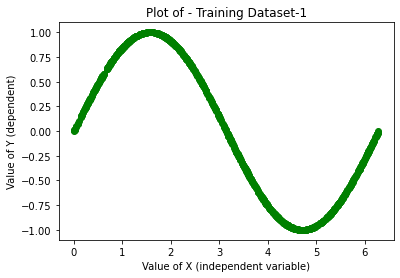

In [ ]:
#Plot Trainig DataSet -1 ----------------------------

X = data.iloc[:,0]
Y = data.iloc[:,1]
plt.scatter(X,Y,color = 'green')
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Training Dataset-1")

In [ ]:
#fetch dataset -2 ------------------------
data2=p.read_csv("/content/drive/MyDrive/PRML/IITM/Question1/Train_Dataset2.csv", header=None)
print(data2.shape)
data2

(1000, 2)


,0,1
0,0.569748,-0.562561
1,0.297377,-1.212756
2,0.639432,-0.447175
3,0.408786,-0.894564
4,0.233038,-1.456554
...,...,...
995,0.374830,-0.981282
996,0.725293,-0.321179
997,0.685673,-0.377354
998,0.449139,-0.800422


Text(0.5, 1.0, 'Plot of - Training Dataset-2')

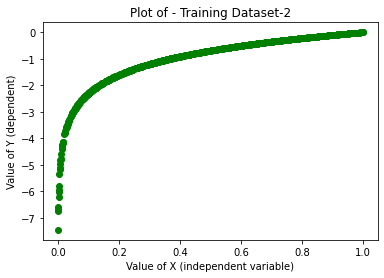

In [ ]:
#Plot training Dataset -2 -----------------------------
X2 = data2.iloc[:,0]
Y2 = data2.iloc[:,1]
plt.scatter(X2,Y2,color = 'green')
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Training Dataset-2")

In [ ]:
#Function for dataset-1 -------------------------------------------

import math

lr = 0.2

def sig(x):
    return 1 / (1 + math.exp(-x))

#function for forward pass for dataset-1
def forward_1(i,wh,wo,b1,b2):
    neth = [(i*wh[p]+b1[p]) for p in range(3)]
    outh = [sig(neth[p]) for p in range(3)]
    neto = (wo[0]*outh[0])+(wo[1]*outh[1])+(wo[2]*outh[2])+b2
    return neto, neto, outh, neth

def predict_1(i,wh,wo,b1,b2):
    sum = 0.0
    for p in range(len(wh)):
        sum = sum + (wo[p]*sig(i*wh[p]+b1[p]))
    return (sum+b2)
    #return (wo[0]*sig(i*wh[0]+b1[0]))+(wo[1]*sig(i*wh[1]+b1[1]))+(wo[2]*sig(i*wh[2]+b1[2]))+b2

In [ ]:
# For DataSet 1  ------------------

#Random Initialization of weights and bias.

wh = [0.8,0.4,1.2]  #weights for hidden node
wo = [0.5,0.7,0.6]  #weights for output node
b1 = [0.1,0.3,0.2]  #Bias at the hidden layer
b2 = 0.5            #Bias at output node

neth = [0.0,0.0,0.0]  #Pre-activation result at hidden layer
outh = [0.0,0.0,0.0]  #output at hidden layer
neto = 0.0            #Pre-activation as well as output at output node


In [ ]:
for epoch in range(5000):
    for i in range(len(X)):
        outo,neto,outh,neth = forward_1(X[i],wh,wo,b1,b2)
        ErrTot = (0.5)*((Y[i]-outo)**2)
        delta_2 = (outo - Y[i]) 
        del_1 = [(wo[p]*(outh[p]*(1-outh[p]))) for p in range(3)]

        #updation process in backpropagation
        for j in range(3):
            wh[j] = wh[j]-(lr*(delta_2*del_1[j]*X[i]))
            b1[j] = b1[j]-(lr*(delta_2*del_1[j]))
            wo[j] = wo[j]-(lr*(delta_2*outh[j]))
            b2 = b2 - (lr*delta_2) 

[2.076026600471171, -1.489118265849647, -1.8196608489530643] [1.9060836783944228, 2.8550216011261953, -2.2297457383649877] [-12.239880985617926, 4.627733850540465, 0.5797536962126796] -1.3910131657784668


Text(0.5, 1.0, 'Plot of - Training Dataset-1')

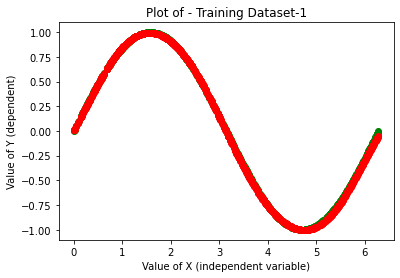

In [ ]:
pred=[]
for i in range(len(X)):
    pred.append(predict_1(X[i],wh,wo,b1,b2))  #Predict on training data using trained Model 

print(wh,wo,b1,b2) 
plt.scatter(X,Y,color = 'green')  #Green is for actual Plot
plt.scatter(X,pred,color = 'red') #Red is for predicted plot
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Training Dataset-1")

In [ ]:
MSE = 0.0 #Mean squared loss on Training Data-1

for i in range(len(Y)):
    MSE = MSE + ((Y[i] - pred[i])**2)
MSE = MSE/len(Y)
print("Mean Squared Loss on Training Data-1 = ",MSE)

Mean Squared Loss on Training Data-1 =  0.00015092058683898826


(300, 2)


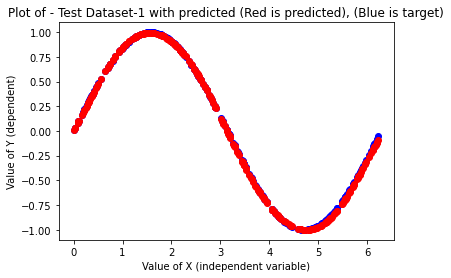

In [ ]:
Testdata=p.read_csv("/content/drive/MyDrive/PRML/IITM/Question1/Test_Dataset1.csv", header=None)
print(Testdata.shape)
Xt1 = Testdata.iloc[:,0]
Yt1 = Testdata.iloc[:,1]
plt.scatter(Xt1,Yt1,color = 'blue')
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Test Dataset-1 with predicted (Red is predicted), (Blue is target)")

ytpred1=[]  #Y prediction on testdata-1

for i in range(len(Xt1)):
    ytpred1.append(predict_1(Xt1[i],wh,wo,b1,b2))
    
plt.scatter(Xt1,ytpred1,color = 'red')

In [ ]:
MSE = 0.0 #Mean squared loss on testing data

for i in range(len(Yt1)):
    MSE = MSE + ((Yt1[i] - ytpred1[i])**2)
MSE = MSE/len(Yt1)
print("Mean Squared Loss on Test Data-1 = ",MSE)

Mean Squared Loss on Test Data-1 =  0.00013898049690079934


In [ ]:
#For dataset - 2 ------------------------------------

lr2 = 0.2

#Function to evaluate the forward pass for 2nd Dataset
def forward_2(x,wh,wo,b1,b2):
    neth = [(x*wh[p]+b1[p]) for p in range(len(wh))]
    outh = [sig(neth[p]) for p in range(len(neth))]
    snet = 0.0
    for k in range(len(outh)):
        snet = snet + (wo[k]*outh[k])
    
    neto = snet+b2
    #neto = (wo[0]*outh[0])+(wo[1]*outh[1])+(wo[2]*outh[2])+b2
    return neto, neto, outh, neth

def predict_2(i,wh,wo,b1,b2):
    sum = 0.0
    for p in range(len(wh)):
        sum = sum + (wo[p]*sig(i*wh[p]+b1[p]))
    return (sum+b2)
    #return (wo[0]*sig(i*wh[0]+b1[0]))+(wo[1]*sig(i*wh[1]+b1[1]))+(wo[2]*sig(i*wh[2]+b1[2]))+b2

In [ ]:
# For DataSet 2  ------------------
#Random initialization of weights and bias
wh2 = [150,-5.588]
wo2 = [54932,-6.64]
b21 = [9.33,-0.267]
b22 = -54933

neth2 = [0.0,0.0]
outh2 = [0.0,0.0]
neto2 = 0.0

In [ ]:
#Training data set 2

for epoch in range(10000):
    for i in range(len(X2)):
        outo2,neto2,outh2,neth2 = forward_2(X2[i],wh2,wo2,b21,b22)
        ErrTot2 = (0.5)*((Y2[i]-outo2)**2)
        delta2_2 = (outo2 - Y2[i]) #*(1-outo)*outo
        del2_1 = [(wo2[p]*(outh2[p]*(1-outh2[p]))) for p in range(len(wo2))]
        
        #Do the updates
        for j in range(len(wh2)):
            wh2[j] = wh2[j]-(lr2*(delta2_2*del2_1[j]*X2[i]))
            b21[j] = b21[j]-(lr2*(delta2_2*del2_1[j]))
            wo2[j] = wo2[j]-(lr2*(delta2_2*outh2[j]))
            b22 = b22 - (lr2*delta_2)

[91.68353358449545, -5.52960693926607] [136777.24528470894, -8.482495887949238] [10.656357067959862, -0.5980841864311872] -136777.59485278296


Text(0.5, 1.0, 'Plot of - Training Dataset-2')

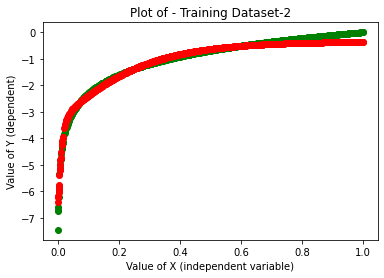

In [ ]:
pred2=[]
for i in range(len(X2)):
    pred2.append(predict_2(X2[i],wh2,wo2,b21,b22))

print(wh2,wo2,b21,b22) 
plt.scatter(X2,Y2,color = 'green')
plt.scatter(X2,pred2,color = 'red')
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Training Dataset-2")

In [ ]:
MSE = 0.0 #Mean squared loss on Training Data

for i in range(len(Y2)):
    MSE = MSE + ((Y2[i] - pred2[i])**2)
MSE = MSE/len(Y2)
print("Mean Squared Loss on Training Data-2 = ",MSE)

Mean Squared Loss on Training Data-2 =  0.022750335682243848


(300, 2)


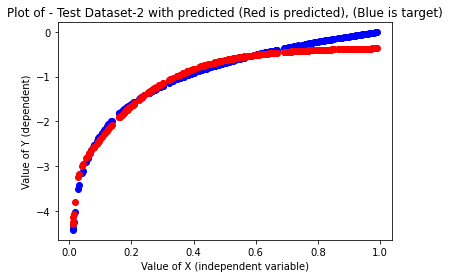

In [ ]:
Testdata2=p.read_csv("/content/drive/MyDrive/PRML/IITM/Question1/Test_Dataset2.csv", header=None)
print(Testdata2.shape)
Xt2 = Testdata2.iloc[:,0]
Yt2 = Testdata2.iloc[:,1]
plt.scatter(Xt2,Yt2,color = 'blue')
plt.xlabel("Value of X (independent variable)")
plt.ylabel("Value of Y (dependent)")
plt.title("Plot of - Test Dataset-2 with predicted (Red is predicted), (Blue is target)")

ytpred2=[]  #Y prediction on testdata-2

for i in range(len(Xt2)):
    ytpred2.append(predict_2(Xt2[i],wh2,wo2,b21,b22))
    
plt.scatter(Xt2,ytpred2,color = 'red')

In [ ]:
MSE = 0.0 #Mean squared loss on testing data-2

for i in range(len(Yt2)):
    MSE = MSE + ((Yt2[i] - ytpred2[i])**2)
MSE = MSE/len(Yt2)
print("Mean Squared Loss on Test Data-2 = ",MSE)

Mean Squared Loss on Test Data-2 =  0.022058246129643033
